# Code/Graph Progress
1. DONE
2. DONE
3. DONE
4. DONE
5. DONE
6. Not Started
7. DONE
8. Not Started
9. N/A

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATA


In [12]:
side_data = pd.read_csv('460lab2abx_others.csv', header=[0, 1]) # read in data with multiindex

# Velocity data from sheet in lab
velocities = np.array([99.8522, 99.4136, 99.7461, 100.087,\
                       100.496, 100.147, 99.852, 100.09,\
                       99.182, 100.488, 100.008, 100.305,\
                       99.2348, 99.7946, 99.7679, 99.9649,\
                       100.2841, 100.357, 100.291, 100.147,\
                       99.837, 99.7161, 99.4411])

side_data[('Velocity', '[ft/s]')] = velocities
side_data.sort_values(by=[(' AOA', ' [deg]')], inplace=True)
side_data.drop_duplicates(subset=(' AOA', ' [deg]'), inplace=True) # Not needed i think
side_data.drop(index=1, inplace=True) # dropping the row associated with aoa = -8 as it messes up the scale on the data
side_data

,AOA,q_WT corrected,q_corr_fac,AmbTemp,AmbPress,Reynolds #,Velocity
,[deg],[psid],[ND],[Rankine],[psia],[ND],[ft/s]
0,-6.0,0.078503,0.95,530.37,14.331757,173683.5313,99.8522
2,-4.0,0.077843,0.95,530.37,14.331757,172951.9219,99.7461
3,-2.0,0.078539,0.95,530.37,14.331757,173722.6094,100.0870
4,0.0,0.080270,0.95,530.37,14.331757,175627.2344,100.4960
5,2.0,0.076241,0.95,530.37,14.331757,171162.1719,100.1470
6,4.0,0.079710,0.95,530.37,14.331757,175013.7031,99.8520
7,6.0,0.080170,0.95,530.37,14.331757,175517.8594,100.0900
8,8.0,0.077478,0.95,530.37,14.331757,172545.9688,99.1820
9,10.0,0.079506,0.95,530.37,14.331757,174788.6094,100.4880


In [13]:
main_data = pd.read_csv('460lab2abx_taps.csv', header=[0, 1])
main_data.drop('x/c', axis=1, level=0, inplace=True)
main_data.drop(main_data.columns[[-1]], axis=1, inplace=True) # dropping last column because it is not read in properly for some reason
main_data.drop(index=1, inplace=True) # dropping the row associated with aoa = -8
main_data.sort_values(by=(' AOA', ' [deg]'), inplace=True)
main_data.drop_duplicates(subset=(' AOA', ' [deg]'), inplace=True)
main_data

,AOA,1,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,...,0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
,[deg],0,0.05248,0.073468,0.090605,0.102701,0.109032,0.108445,0.10036,0.075339,...,0,-0.03115,-0.03513,-0.03548,-0.03146,-0.02707,-0.02268,-0.01828,-0.01389,-0.0095
0,-6.0,-0.078332,-0.018203,-0.020539,-0.025904,-0.030183,-0.031552,-0.028639,-0.025139,0.003694,...,-0.062090,-0.002447,-0.005951,-0.010013,-0.014434,-0.019516,-0.027618,-0.040703,-0.069214,-0.138461
2,-4.0,-0.053379,-0.022795,-0.024325,-0.028502,-0.034286,-0.037815,-0.037386,-0.037427,-0.011905,...,-0.006167,-0.000879,-0.003459,-0.006628,-0.009954,-0.013825,-0.020057,-0.030322,-0.054577,-0.083963
3,-2.0,-0.035529,-0.018861,-0.030427,-0.033392,-0.039624,-0.045270,-0.047353,-0.051028,-0.028945,...,0.036900,0.000981,-0.000833,-0.003024,-0.005297,-0.007690,-0.012503,-0.025202,-0.038226,-0.052196
4,0.0,-0.019679,-0.012248,-0.038334,-0.042986,-0.048417,-0.055873,-0.061251,-0.069671,-0.052957,...,0.068054,0.002927,0.001540,0.000063,-0.001497,-0.003317,-0.006480,-0.011736,-0.020115,-0.027111
5,2.0,-0.009785,-0.015358,-0.027400,-0.050149,-0.054442,-0.061685,-0.069766,-0.082111,-0.072579,...,0.070256,0.004658,0.004021,0.003388,0.002884,0.002186,0.000826,-0.001556,-0.004155,-0.004212
6,4.0,-0.001430,-0.017617,-0.030547,-0.046036,-0.067265,-0.073755,-0.084295,-0.101346,-0.098626,...,0.073455,0.006993,0.007211,0.007342,0.007681,0.007956,0.008022,0.007905,0.009719,0.014758
7,6.0,0.006005,-0.019668,-0.034830,-0.049832,-0.060384,-0.091393,-0.100045,-0.118734,-0.125879,...,0.057991,0.007760,0.008962,0.010085,0.011428,0.012697,0.014307,0.016452,0.022386,0.031677
8,8.0,0.013107,-0.017838,-0.033468,-0.050021,-0.062988,-0.077623,-0.112866,-0.127287,-0.144026,...,0.025721,0.009436,0.011433,0.013203,0.015336,0.017295,0.020045,0.023866,0.032642,0.044052
9,10.0,0.018505,-0.017818,-0.033954,-0.052283,-0.068920,-0.085727,-0.122897,-0.146073,-0.169579,...,-0.016271,0.010188,0.013180,0.015778,0.018696,0.021538,0.025387,0.030759,0.041902,0.054828


Plotting the tap cordinates for sanity check

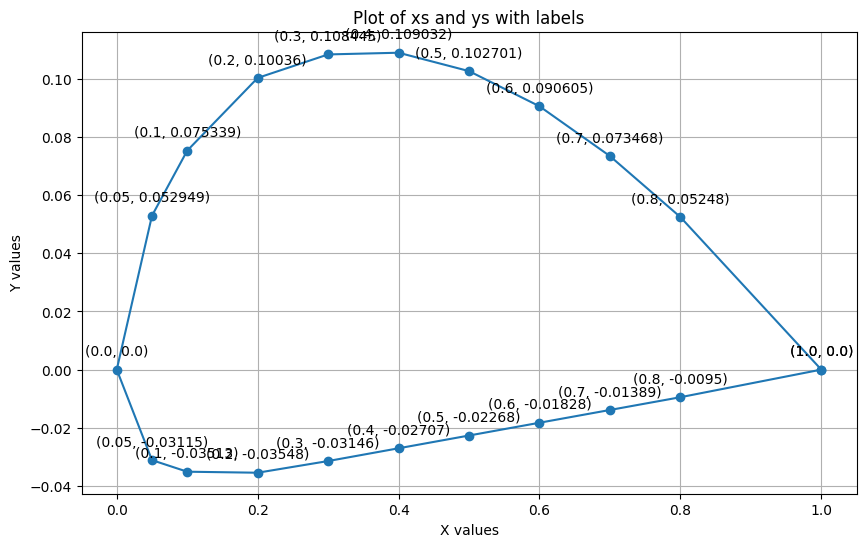

In [14]:
aoas = main_data[' AOA'].values
xs = []
ys = []
preasures = []
for i, col in enumerate(main_data.columns.values[1:]):
    # print(col)
    xs.append(float(col[0]))
    ys.append(float(col[1]))
xs.append(xs[0])
ys.append(ys[0])
for i, row in enumerate(aoas):
    p = main_data.iloc[i, 1:].values.flatten().tolist()
    preasures.append(p)
preasures = np.array(preasures)

plt.figure(figsize=(10, 6))
plt.plot(xs, ys, marker='o', linestyle='-')
for i, txt in enumerate(zip(xs, ys)):
    plt.annotate(f'({txt[0]}, {txt[1]})', (xs[i], ys[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot of xs and ys with labels')
plt.grid(True)
plt.show()

# delting from global namespace because the data was manipulated to produce a good plot
# these should not be use because they do not represent the read data
del([xs, ys])

# Calculating values and Graphing (Question 1, 5, 7)

In [15]:
coords = np.array(main_data.columns.values[1:]) # Excludes the aoa column
pressure_data = main_data.iloc[:, 1:].values # Excludes the aoa column
# pressure_data = pressure_data
# pressure_data.shape, coords.shape
# q_corrected = side_data[' q_WT corrected'].values[1:]
q_corrected = side_data[' q_WT corrected'].values
Cns = []
Cas = []
Cm_LExs = []
Cm_LEys = []
Cls = []
Cmc4 = []
for i, aoa in enumerate(aoas.flatten()):
    cn_temp = 0.0
    ca_temp = 0.0
    cm_LEx = 0.0
    cm_LEy = 0.0
    for j, tap_coord in enumerate(coords[:len(coords) - 1]):
        x, y = tap_coord
        x = float(x)
        y = float(y)
        p = pressure_data[i, j]
        cp = p / q_corrected[i]
        cp1 = pressure_data[i, j + 1] / q_corrected[i]
        cn_temp += 0.5 * (cp + cp1) * (float(coords[j+1][0]) - x)
        ca_temp += 0.5 * (cp + cp1) * (float(coords[j+1][1]) - y)
        cm_LEx += 0.5 * (cp*x + cp1 * float(coords[j+1][0])) * (x- float(coords[j+1][0]))
        cm_LEy += 0.5 * (cp*y + cp1 * float(coords[j+1][1])) * (y- float(coords[j+1][1]))

    Cns.append(cn_temp)
    Cas.append(-ca_temp)
    Cm_LExs.append(cm_LEx)
    Cm_LEys.append(cm_LEy)
    Cls.append(cn_temp * np.cos(np.radians(aoa)) - ca_temp * np.sin(np.radians(aoa)))
    Cmc4.append(cm_LEx + cm_LEy + 0.25*Cls[-1])

Cns = np.array(Cns)
Cas = np.array(Cas)
Cm_LExs = np.array(Cm_LExs)
Cm_LEys = np.array(Cm_LEys)
Cls = np.array(Cls)
Cmc4 = np.array(Cmc4)


# Create a dictionary with the calculated data
data_dict = {
    'AOA [deg]': aoas.flatten(),
    'Cn': Cns.flatten(),
    'Ca': Cas.flatten(),
    'Cm_LEx': Cm_LExs.flatten(),
    'Cm_LEy': Cm_LEys.flatten(),
    'Cl': Cls.flatten(),
    'Cm_c/4': Cmc4.flatten()
}

# Create a DataFrame from the dictionary
calculated_data_df = pd.DataFrame(data_dict)

# Set the angle of attack as the index
calculated_data_df.set_index('AOA [deg]', inplace=True)

# Display the DataFrame
calculated_data_df

,Cn,Ca,Cm_LEx,Cm_LEy,Cl,Cm_c/4
AOA [deg],,,,,,
-6.0,-0.014152,0.041868,-0.017150,0.001906,-0.018451,-0.019857
-4.0,0.134977,0.048429,-0.072006,0.001155,0.131270,-0.038033
-2.0,0.272230,0.045550,-0.114147,0.000124,0.270474,-0.046404
0.0,0.441696,0.029247,-0.166653,-0.001298,0.441696,-0.057527
2.0,0.614011,0.003578,-0.224711,-0.002750,0.613762,-0.074021
4.0,0.773583,-0.026630,-0.274905,-0.004333,0.769841,-0.086777
6.0,0.939348,-0.067638,-0.326669,-0.006125,0.927132,-0.101011
8.0,1.066426,-0.117156,-0.359581,-0.007927,1.039742,-0.107572
10.0,1.187120,-0.168946,-0.392057,-0.009550,1.139748,-0.116670


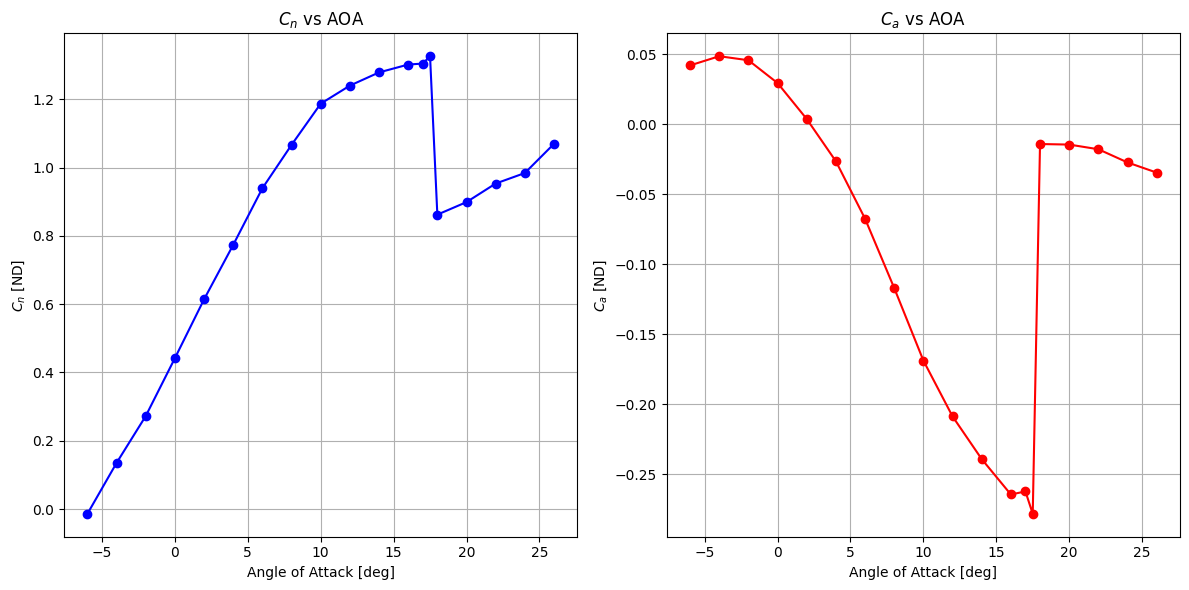

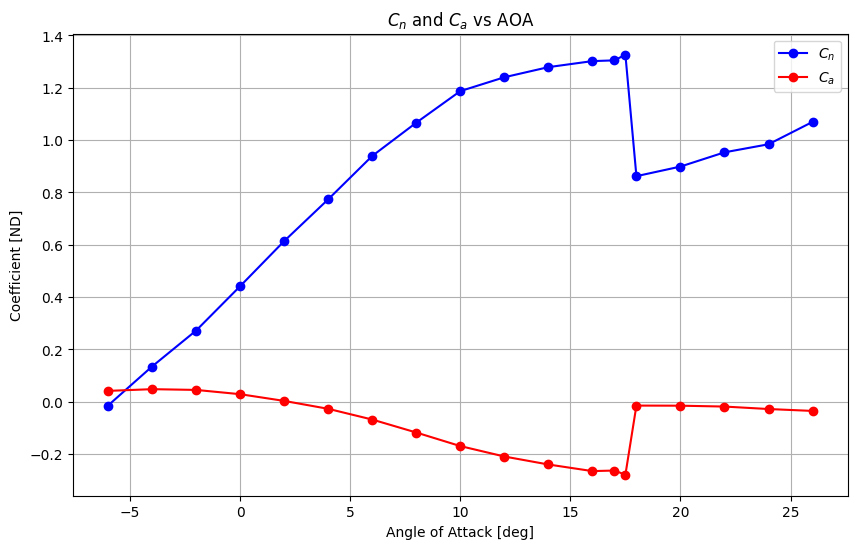

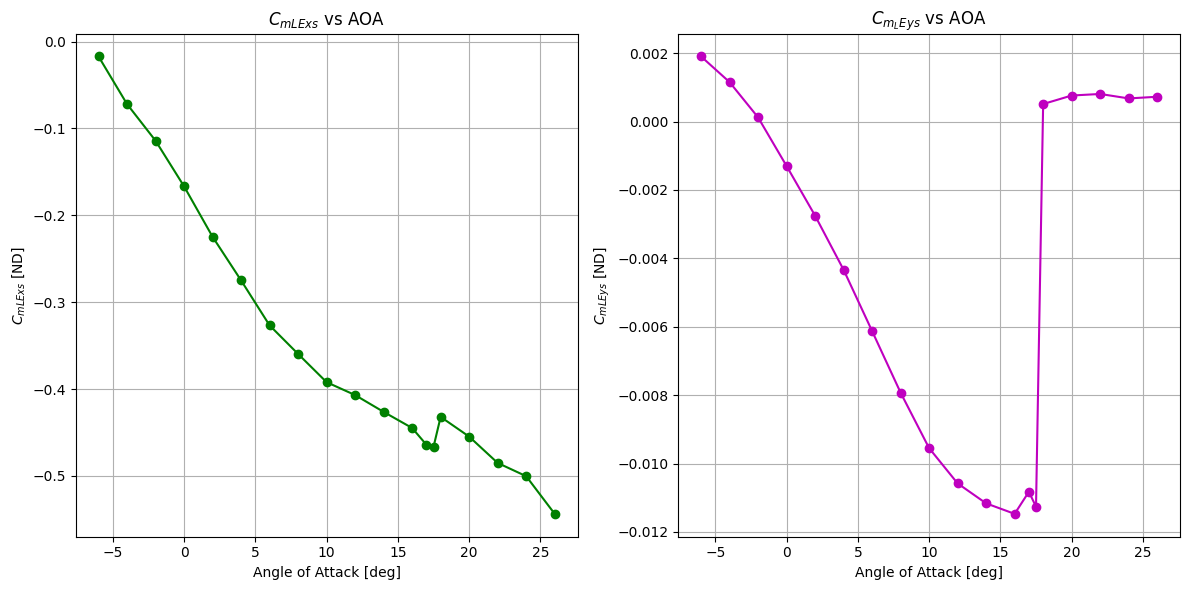

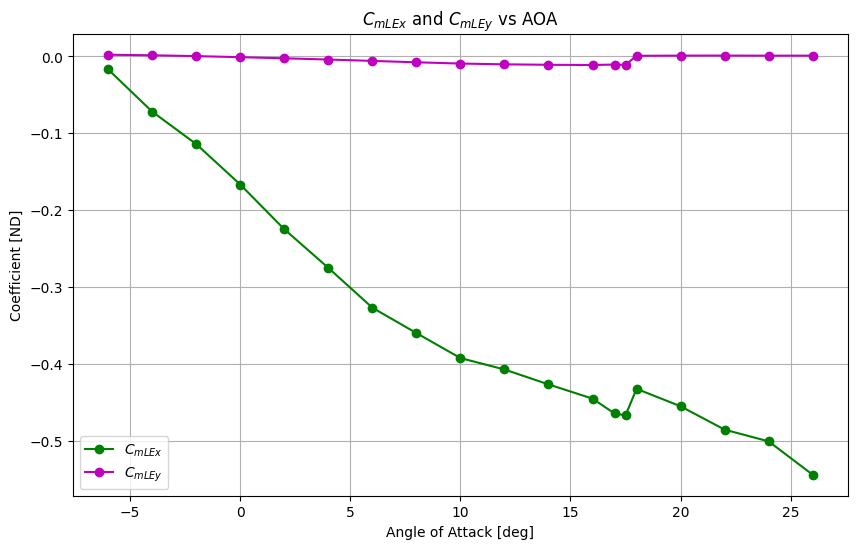

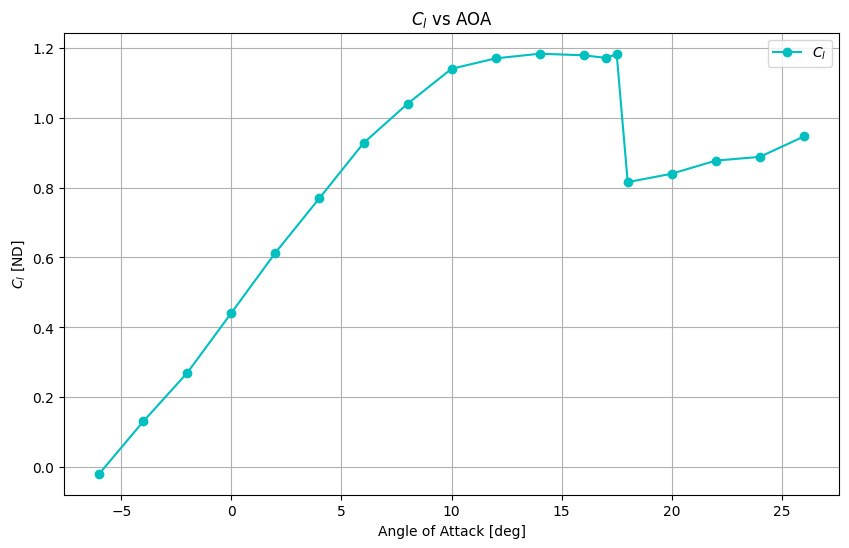

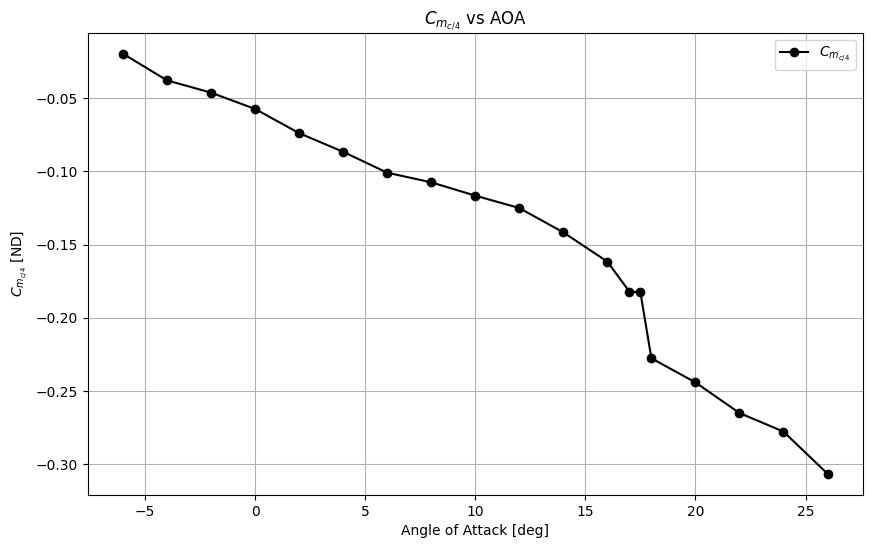

In [16]:
plt.figure(figsize=(12, 6)) 
# Plot Cns vs aoa
plt.subplot(1, 2, 1)
plt.plot(aoas.flatten(), Cns, marker='o', linestyle='-', color='b')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_n$ [ND]')
plt.title('$C_n$ vs AOA')
plt.grid(True)

# Plot Cas vs aoa
plt.subplot(1, 2, 2)
plt.plot(aoas.flatten(), Cas, marker='o', linestyle='-', color='r')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_a$ [ND]')
plt.title('$C_a$ vs AOA')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cns, marker='o', linestyle='-', color='b', label='$C_n$')
plt.plot(aoas.flatten(), Cas, marker='o', linestyle='-', color='r', label='$C_a$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Coefficient [ND]')
plt.title('$C_n$ and $C_a$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6)) 
# Plot Cm_LExs vs aoa
plt.subplot(1, 2, 1)
plt.plot(aoas.flatten(), Cm_LExs, marker='o', linestyle='-', color='g')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{mLExs}$ [ND]')
plt.title('$C_{mLExs}$ vs AOA')
plt.grid(True)

# Plot Cm_LEys vs aoa
plt.subplot(1, 2, 2)
plt.plot(aoas.flatten(), Cm_LEys, marker='o', linestyle='-', color='m')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{mLEys}$ [ND]')
plt.title('$C_{m_LEys}$ vs AOA')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cm_LExs, marker='o', linestyle='-', color='g', label='$C_{mLEx}$')
plt.plot(aoas.flatten(), Cm_LEys, marker='o', linestyle='-', color='m', label='$C_{mLEy}$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Coefficient [ND]')
plt.title('$C_{mLEx}$ and $C_{mLEy}$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='-', color='c', label='$C_l$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.title('$C_l$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cmc4, marker='o', linestyle='-', color='k', label='$C_{m_{c/4}}$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{m_{c/4}}$ [ND]')
plt.title('$C_{m_{c/4}}$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
chord_length = 3.5 / 12 # convert inches to feet

# density caluculated using ideal gas law
density = (side_data[' AmbPress'].values*144) / (1716 * side_data[' AmbTemp'].values)
V = side_data['Velocity'].values

# viscocity calculated using fomula from Prof Merret's 442 lecture slides
viscocity = (2.2697e-8 * side_data[' AmbTemp'].values**(3/2)) / (side_data[' AmbTemp'].values + 198.72)
R = (density * V * chord_length) / viscocity
side_data[('Calculated Reynolds #', '[ND]')] = R
side_data

,AOA,q_WT corrected,q_corr_fac,AmbTemp,AmbPress,Reynolds #,Velocity,Calculated Reynolds #
,[deg],[psid],[ND],[Rankine],[psia],[ND],[ft/s],[ND]
0,-6.0,0.078503,0.95,530.37,14.331757,173683.5313,99.8522,173681.830785
2,-4.0,0.077843,0.95,530.37,14.331757,172951.9219,99.7461,173497.281599
3,-2.0,0.078539,0.95,530.37,14.331757,173722.6094,100.0870,174090.239351
4,0.0,0.080270,0.95,530.37,14.331757,175627.2344,100.4960,174801.649503
5,2.0,0.076241,0.95,530.37,14.331757,171162.1719,100.1470,174194.602699
6,4.0,0.079710,0.95,530.37,14.331757,175013.7031,99.8520,173681.482907
7,6.0,0.080170,0.95,530.37,14.331757,175517.8594,100.0900,174095.457519
8,8.0,0.077478,0.95,530.37,14.331757,172545.9688,99.1820,172516.092193
9,10.0,0.079506,0.95,530.37,14.331757,174788.6094,100.4880,174787.734390


Remove lines from graph. Invert Y

<>:36: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:36: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vsv3\AppData\Local\Temp\ipykernel_21860\961735256.py:36: SyntaxWarning: invalid escape sequence '\d'
  plt.plot([float(coord[0]) for coord in coords if float(coord[1]) >= 0], Cps_top[idx], marker='o', linestyle='', color=color, label=f'Top AOA = ${aoas[idx][0]}\degree$')
C:\Users\vsv3\AppData\Local\Temp\ipykernel_21860\961735256.py:37: SyntaxWarning: invalid escape sequence '\d'
  plt.plot([float(coord[0]) for coord in coords if float(coord[1]) < 0], Cps_bottom[idx], marker='x', linestyle='', color=color, label=f'Bottom AOA = ${aoas[idx][0]}\degree$')


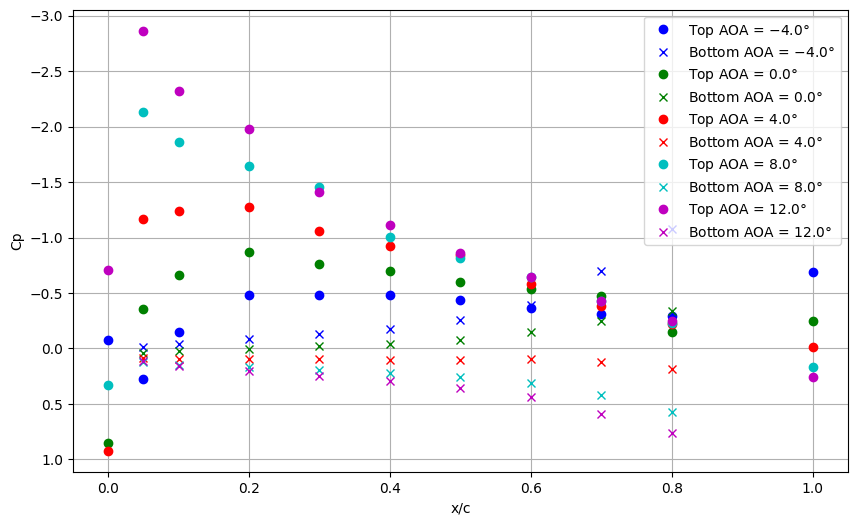

In [18]:
coords = np.array(main_data.columns.values[1:])
Cps_top = []
Cps_bottom = []

for i, aoa in enumerate(aoas.flatten()):
    cp_temp_top = []
    cp_temp_bottom = []
    for j, tap_coord in enumerate(coords):
        x, y = tap_coord
        x = float(x)
        y = float(y)
        p = pressure_data[i, j]
        cp = p / q_corrected[i]
        if y >= 0:
            cp_temp_top.append(cp)
        else:
            cp_temp_bottom.append(cp)
    Cps_top.append(cp_temp_top)
    Cps_bottom.append(cp_temp_bottom)

Cps_top = np.array(Cps_top)
Cps_bottom = np.array(Cps_bottom)

# Define the angles of attack to plot
aoa_idxs_to_plot = [1, 3, 5, 7, 9]

# Define a list of colors for each AOA
colors = ['b', 'g', 'r', 'c', 'm']

# Create a figure
plt.figure(figsize=(10, 6))

# Plot Cp values for the specified AOA indexes
for i, idx in enumerate(aoa_idxs_to_plot):
    color = colors[i % len(colors)]
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) >= 0], Cps_top[idx], marker='o', linestyle='', color=color, label=f'Top AOA = ${aoas[idx][0]}\degree$')
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) < 0], Cps_bottom[idx], marker='x', linestyle='', color=color, label=f'Bottom AOA = ${aoas[idx][0]}\degree$')

plt.xlabel('x/c')
plt.ylabel('Cp')
plt.gca().yaxis.set_inverted(True)
# plt.title('Cp vs x/c for different AOAs')
plt.legend()
plt.grid(True)
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vsv3\AppData\Local\Temp\ipykernel_21860\2625245227.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.plot([float(coord[0]) for coord in coords if float(coord[1]) >= 0], Cps_top[idx], marker='o', linestyle='', color=color, label=f'Top AOA = ${aoas[idx][0]}\degree$')
C:\Users\vsv3\AppData\Local\Temp\ipykernel_21860\2625245227.py:14: SyntaxWarning: invalid escape sequence '\d'
  plt.plot([float(coord[0]) for coord in coords if float(coord[1]) < 0], Cps_bottom[idx], marker='x', linestyle='', color=color, label=f'Bottom AOA = ${aoas[idx][0]}\degree$')


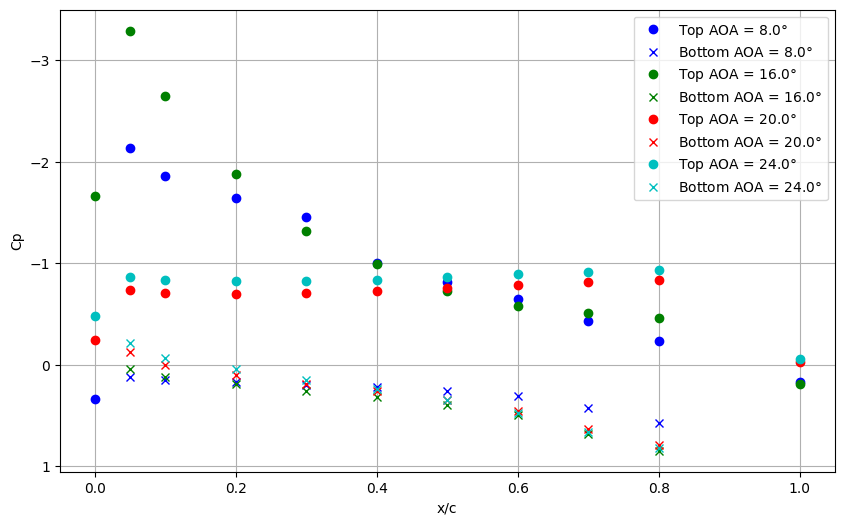

In [19]:
# Define the angles of attack to plot
aoas_to_plot = [8, 16, 20, 24]

# Find the indices corresponding to the specified angles of attack
aoa_indices = [np.where(aoas.flatten() == aoa)[0][0] for aoa in aoas_to_plot]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot Cp values for the specified AOA indexes
for i, idx in enumerate(aoa_indices):
    color = colors[i % len(colors)]
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) >= 0], Cps_top[idx], marker='o', linestyle='', color=color, label=f'Top AOA = ${aoas[idx][0]}\degree$')
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) < 0], Cps_bottom[idx], marker='x', linestyle='', color=color, label=f'Bottom AOA = ${aoas[idx][0]}\degree$')

plt.xlabel('x/c')
plt.ylabel('Cp')
plt.gca().yaxis.set_inverted(True)
# plt.title('Cp vs x/c for different AOAs')
plt.legend()
plt.grid(True)
plt.show()